In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [3]:
## Ne garder que les images non câblées

liste=[]
dossier="ModulePictures"

for fichier in os.listdir(dossier):
    if os.path.isfile(os.path.join(dossier, fichier)) and ("Reception" in os.path.basename(fichier)):
        liste.append(str(dossier + "/"+ os.path.basename(fichier)))

[180 164  29]
[184 102  29]
[100 152  29]
[110  92  29]
[170  80  29]
[166 218  29]
[114  74  29]
[118 210  29]


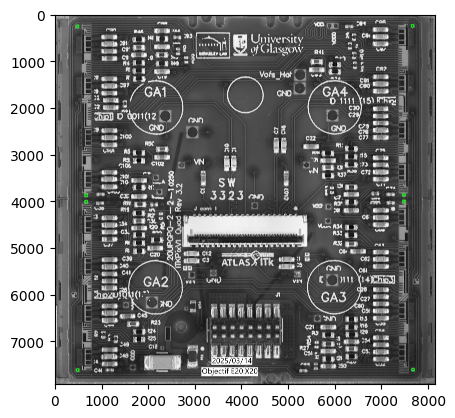

In [26]:
for path in liste[:1] :
    #Lecture de l'image en noir et blanc
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "file could not be read, check with os.path.exists()"

    (height,length) = img.shape

    ## TODO : changer cette extraction à la main par quelque chose d'automatisé
    sliceparams = [(100, 400, 300, 600, 1), (-400,-100,300,600, 1), (100,400, -600,-300, 1), (-400, -100, -600, -300, 1), (3800,4200,500,800,2), (3800,4200,-800,-500,2)]

    nbmires = 1
    cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)

    for (beg1, end1, beg2, end2, nbmires) in sliceparams :
        mask = img[beg1:end1, beg2:end2]

        #Blur pour réduire le bruit
        mask = cv.medianBlur(mask,5)
        #Fonction qui détecte les cercles.
        circles = cv.HoughCircles(mask,cv.HOUGH_GRADIENT,1,minDist = 100,
                                    param1=50,param2=20,minRadius=20 ,maxRadius=30)

        #Dessin des cercles
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0,:nbmires]:
                cv.circle(cimg,(i[0]+beg2%length,i[1]+beg1%height),i[2],(0,255,0),20)
                cv.circle(cimg,(i[0]+beg2%length,i[1]+beg1%height),2,(0,0,255),3)
                print(i)

    plt.imshow(cimg)